# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


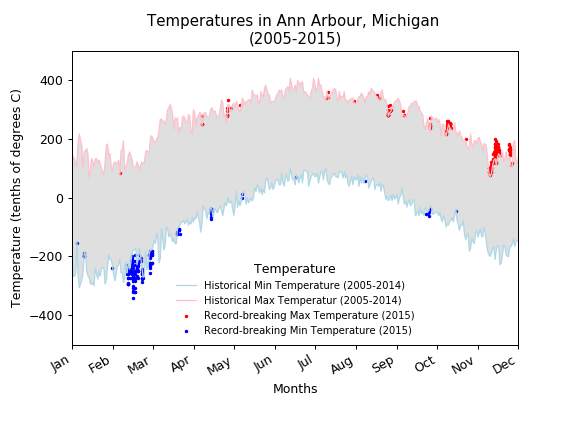

In [2]:
%matplotlib notebook
import numpy as np

#read data from the csv file
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Sort in order by Date
df = df.sort_values(by='Date')

#Create new column with year & Month_Day
df['Year'] = pd.to_datetime(df['Date']).dt.strftime("%Y")
df['Month_Day']=pd.to_datetime(df['Date']).dt.strftime("%m-%d")
#Remove year leap dates
df = df[~df.Date.str.endswith('02-29')]
#Separate the raw data with 2 groups: year 2015 vs. year 2005-2014 
df_rest = df[df.Year != '2015']
df_2015 = df[df.Year == '2015']

#create a new dataframe with only TMIN, find the daily min temp during 2005-2014
df_min = df_rest[df_rest['Element']=='TMIN']
df_min = df_min.groupby('Month_Day')['Data_Value'].min()

#create a new dataframe only TMAX, find the daily max temp during 2005-2014
df_max = df_rest[df_rest['Element']=='TMAX']
df_max = df_max.groupby('Month_Day')['Data_Value'].max()

#create a new dataframe to include daily temp min & max from year 2005-2014 to the 2015 dataframe
df_new = pd.merge(df_2015,df_max.reset_index(drop=False).rename(columns={'Data_Value':'Max'}), on='Month_Day', how='left')
df_new = pd.merge(df_new,df_min.reset_index(drop=False).rename(columns={'Data_Value':'Min'}), on='Month_Day', how='left')

#find all the data points where 2015 daily temp exceed the historical max temp or below the historical min temp
high = df_new[df_new['Data_Value']>df_new['Max']]
low = df_new[df_new['Data_Value']<df_new['Min']]

#import datetime as dtt
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

#plotting using matplotlib

plt.figure()

#datetime axis - using 2015 dates only
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
#line plot for historical max and min temps
plt.plot(date_index,df_min.values,color='lightblue',linewidth=1, label='Historical Min Temperature (2005-2014)')
plt.plot(date_index,df_max.values,color='pink',linewidth=1, label='Historical Max Temperatur (2005-2014)')
#scatterplot all the record-breaking datapoints in 2015
plt.scatter(high.Date.values, high.Data_Value.values, color='red', s=3, label='Record-breaking Max Temperature (2015)')
plt.scatter(low.Date.values, low.Data_Value.values, color='blue', s=3,label='Record-breaking Min Temperature (2015)')

# Set range for the axes and show 2015 dates only
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-500,500])

#set up labels for axes and title of the chart
plt.xlabel('Months')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Temperatures in Ann Arbour, Michigan \n(2005-2015)', fontsize=12)
#set up legend of the table 
plt.legend(loc = 8, frameon=False, title='Temperature', fontsize=8)
#fill the region between the historical temperature max and min 
ax.fill_between(date_index, df_max, df_min, facecolor='grey', alpha=0.25)
#adjust for x-axis datetime formatting 
plt.gcf().autofmt_xdate()

#remove the top and right borders of the chart
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)

#label the x-axis with Month
start,end=ax.get_xlim()
plt.xticks(np.linspace(start,start + (end-start) , num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec') )

plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<IPython.core.display.Javascript object>


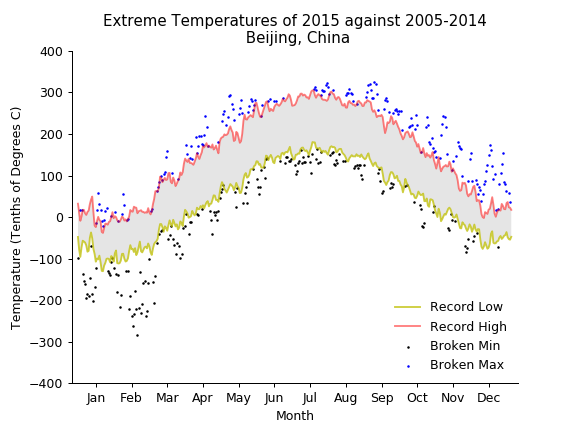

([<matplotlib.axis.XTick at 0x7f8a20b1ab38>,
 <a list of 12 Text xticklabel objects>)

In [3]:

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df = df.sort(['ID', 'Date'])

# Pre-process the data
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Month-Day'] != '02-29']

# df['Month'] = df['Date'].apply(lambda x: x[5:7])

df_min = df[(df['Element'] == 'TMIN')]
df_max = df[(df['Element'] == 'TMAX')]

df_temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
df_temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]

temp_min = df_temp_min.groupby('Month-Day')['Data_Value'].agg({'temp_min_mean': np.mean})
temp_max = df_temp_max.groupby('Month-Day')['Data_Value'].agg({'temp_max_mean': np.mean})

temp_min_15_tmp = df_min[df_min['Year'] == '2015']
temp_max_15_tmp = df_max[df_max['Year'] == '2015']

temp_min_15 = temp_min_15_tmp.groupby('Month-Day')['Data_Value'].agg({'temp_min_15_mean': np.mean})
temp_max_15 = temp_max_15_tmp.groupby('Month-Day')['Data_Value'].agg({'temp_max_15_mean': np.mean})


# Reset Index
temp_min = temp_min.reset_index()
temp_max = temp_max.reset_index()

temp_min_15 = temp_min_15.reset_index()
temp_max_15 = temp_max_15.reset_index()

# Find index
broken_min = (temp_min_15[temp_min_15['temp_min_15_mean'] < temp_min['temp_min_mean']]).index.tolist()
broken_max = (temp_max_15[temp_max_15['temp_max_15_mean'] > temp_max['temp_max_mean']]).index.tolist()

# print(broken_min)

# print(temp_min_15['temp_min_15_mean'].iloc[broken_min])

plt.figure()

plt.plot(temp_min['temp_min_mean'], 'y', alpha = 0.75, label = 'Record Low')
plt.plot(temp_max['temp_max_mean'], 'r', alpha = 0.5, label = 'Record High')


plt.scatter(broken_min, temp_min_15['temp_min_15_mean'].iloc[broken_min], s = 1, c = 'k', label = 'Broken Min')
plt.scatter(broken_max, temp_max_15['temp_max_15_mean'].iloc[broken_max], s = 1, c = 'b', label = 'Broken Max')

plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\n Beijing, China')

plt.gca().fill_between(range(len(temp_min)), 
                       temp_min['temp_min_mean'], temp_max['temp_max_mean'], 
                       facecolor='grey', 
                       alpha=0.2)

plt.gca().axis([-5, 370, -400, 400])
plt.legend(frameon = False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)